- Website: ごたごた気流調査所 https://ggcs.io
- GitHub : Gota Gota Current Survey https://github.com/ggcurrs
- Version 1.0.0
- Date : 2020-09-03
- Updated: None

# Setup

In [ ]:
import os
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PROJECT_ROOT_PATH = '.'
# World Population Prospects 2019 / Age composition
SOURCE_PATH = 'https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_Population/WPP2019_POP_F07_1_POPULATION_BY_AGE_BOTH_SEXES.xlsx'

FILE_PATH = os.path.join(PROJECT_ROOT_PATH, os.path.basename(SOURCE_PATH))

# Download the Source file

In [ ]:
# Download World Population Prospects 2019 / Age composition
print('Download: IN PROGRESS')
if not os.path.isfile(FILE_PATH):
  with open(FILE_PATH, 'wb') as f:
    f.write(requests.get(SOURCE_PATH).content)

print('Download: DONE!')

Download: IN PROGRESS
Download: DONE!


# Estimates

## Load the Estimate data

In [ ]:
df_estimates = pd.read_excel(FILE_PATH, sheet_name='ESTIMATES', skiprows=16)
df_estimates.head()

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,Reference date (as of 1 July),0-4,5-9,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,1,Estimates,WORLD,NaN,900,World,0,1950,338497,270083,...,88673.6,73448.2,55142.9,37383.4,21901.8,9627.05,3474.93,947.494,197.844,33.899
1,2,Estimates,WORLD,NaN,900,World,0,1955,407177,316014,...,97657.8,77073,59538.3,40492.8,23753.7,11309.5,3627.3,916.972,165.442,24.153
2,3,Estimates,WORLD,NaN,900,World,0,1960,434008,383756,...,109466,85360.4,63028.7,44212.1,26016.5,12358.9,4386.82,966.933,163.618,20.487
3,4,Estimates,WORLD,NaN,900,World,0,1965,479304,411063,...,119924,96280.8,70710.1,47734.2,29554.7,14364.5,5106.56,1259.12,178.743,20.392
4,5,Estimates,WORLD,NaN,900,World,0,1970,524080,459404,...,130546,107840,82238.5,55586.5,33115.9,17198.6,6269.95,1536.38,245.6,23.137


In [ ]:
# Available countries and exact column names.
country_names = df_estimates['Region, subregion, country or area *'].unique()
country_names

## India

In [ ]:
# Filter for India. iloc[:, 2] -> 'Region, subregion, country or area *'
df_ind_estimates = df_estimates[df_estimates.iloc[:, 2] == 'India']

# To avoid the 'SettingWithCopyWarning':
df_ind_estimates_total = df_ind_estimates.copy()
# Sum of all age groups.
df_ind_estimates_total['India(thoudands)'] = df_estimates.iloc[:, 8:29].sum(axis=1).copy()

# Pick up 'Reference date (as of 1 July)' and 'India' columns 
df_ind_estimates_total = df_ind_estimates_total.iloc[:, [7, 29]]

# Rename a too-long-column-name to 'Year'
df_ind_estimates_total.rename(
    columns={'Reference date (as of 1 July)':'Year'}, inplace=True)

df_ind_estimates_total

## China

In [ ]:
df_chn_estimates = df_estimates[df_estimates.iloc[:, 2] == 'China']
df_chn_estimates_total = df_chn_estimates.copy()
df_chn_estimates_total['China(thoudands)'] = df_estimates.iloc[:, 8:29].sum(axis=1).copy()
df_chn_estimates_total = df_chn_estimates_total.iloc[:, [7, 29]]
df_chn_estimates_total.rename(columns={'Reference date (as of 1 July)':'Year'}, inplace=True)

df_chn_estimates_total

## Both

In [ ]:
# SELECT * FROM df_ind_estimates_total (Left DataFrame)
# JOIN df_chn_estimates_total (Right DataFrame)
# WHERE df_ind_estimates_total.year = df_chn_estimates_total.year (on='Year')
df_ind_chn_estimates =\
   pd.merge(df_ind_estimates_total, df_chn_estimates_total, on='Year')

# Remove duplicate data (2020 ESTIMATE/PROJECTION)
df_ind_chn_estimates.drop(index=14, inplace=True)
df_ind_chn_estimates.reset_index(drop=True, inplace=True)

df_ind_chn_estimates.head()

# Projection

## Load the Projection data

In [ ]:
df_med_variant =\
 pd.read_excel(FILE_PATH, sheet_name='MEDIUM VARIANT', skiprows=16)
 
df_med_variant.head()

## India

In [ ]:
df_ind_projection = df_med_variant[df_med_variant.iloc[:, 2] == 'India']
df_ind_projection_total = df_ind_projection.copy()
df_ind_projection_total['India(thoudands)'] = df_ind_projection.iloc[:, 8:29].sum(axis=1)
df_ind_projection_total = df_ind_projection_total.iloc[:, [7, 29]]
df_ind_projection_total.rename(columns={'Reference date (as of 1 July)':'Year'}, inplace=True)

df_ind_projection_total.head()

## China

In [ ]:
df_chn_projection = df_med_variant[df_med_variant.iloc[:, 2] == 'China']
df_chn_projection_total = df_chn_projection.copy()
df_chn_projection_total['China(thoudands)'] = df_chn_projection.iloc[:, 8:29].sum(axis=1)
df_chn_projection_total = df_chn_projection_total.iloc[:, [7, 29]]
df_chn_projection_total.rename(columns={'Reference date (as of 1 July)':'Year'}, inplace=True)

df_chn_projection_total.head()

## Both

In [ ]:
df_ind_chn_projection =\
 pd.merge(df_ind_projection_total, df_chn_projection_total, on='Year')

df_ind_chn_projection.head()

# ALL

In [ ]:
# Append the projection after the estimates.
df_ind_chn_population =\
   df_ind_chn_estimates.append(df_ind_chn_projection, ignore_index=True)

# Remove the annotation "thousands"
df_ind_chn_population[['India(thoudands)', 'China(thoudands)']] =\
   df_ind_chn_population[['India(thoudands)', 'China(thoudands)']] * 1000

df_ind_chn_population.rename(
    columns={'India(thoudands)':'India', 'China(thoudands)':'China'}, 
              inplace=True)

# Change the data type to integer.
df_ind_chn_population[['India', 'China']] =\
    df_ind_chn_population[['India', 'China']].astype('int')

df_ind_chn_population.head()

,Year,India,China
0,1950,376325200,554419269
1,1955,409880605,612241552
2,1960,450547675,660408054
3,1965,499123328,724218970
4,1970,555189796,827601385


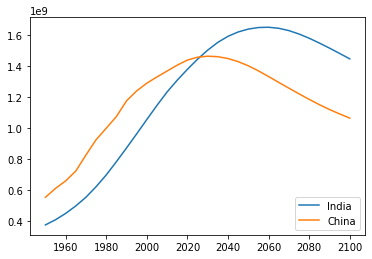

In [ ]:
# Data
x = df_ind_chn_population.Year
y_ind = df_ind_chn_population.India
y_chn = df_ind_chn_population.China

# Plot
plt.plot(x, y_ind, label='India')
plt.plot(x, y_chn, label='China')
plt.legend(loc='lower right')

plt.show()

# Sava as a CSV file

In [ ]:
df_ind_chn_population.to_csv('ind_chn_population.csv', index=False)
print('DONE!')